In [1]:
!pip install qutip-qip

In [2]:
import qutip as qt
from qutip_qip.circuit import QubitCircuit
import matplotlib.pyplot as plt
import numpy as np

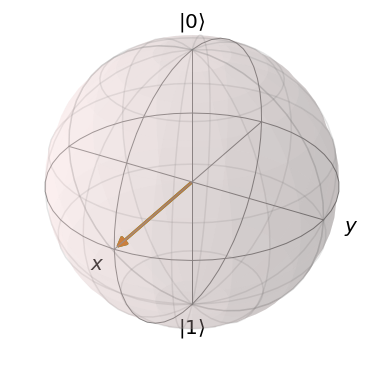

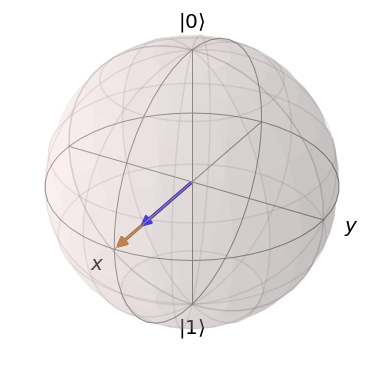

In [11]:
# Problem 2
Psi = (qt.ket("0") + qt.ket("1")).unit()
r = (1, 0, 0)

b = qt.Bloch()
b.add_states(Psi)
b.add_vectors(r)
b.show()

r = (0.7, 0, 0)
b.add_vectors(r)
b.show()